<div style="display:block">
    <div style="width: 100%; display: inline-block; align: center">
        <div style="width: 100%; text-align: center; display: inline-block;"><strong><b><font size="5">MovieLens Case Study </font></b></strong></div>
        <div style="width: 100%; text-align: center; display: inline-block;"><i></i></div>
    </div>
</div>


### Background of Problem Statement :

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

### Problem Objective :

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

In [1]:
import pandas as pd
import numpy as np

In [2]:
ratings = pd.read_csv('ratings.dat', sep='::', header=None)
ratings.head()

/var/folders/62/1yjqp2vn56jdb051vqfk6y2h0000gn/T/ipykernel_7543/3961523043.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv('ratings.dat', sep='::', header=None)


,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
column_names = ['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings.columns = column_names

In [4]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
users = pd.read_csv('users.dat', sep='::', header=None)
users.head()

/var/folders/62/1yjqp2vn56jdb051vqfk6y2h0000gn/T/ipykernel_7543/753019045.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv('users.dat', sep='::', header=None)


,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
column_names = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users.columns = column_names
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
users.shape

(6040, 5)

In [8]:
movies = pd.read_csv('movies.dat', sep='::', header=None, names=['MovieID', 'Title', 'Genres'], encoding='latin-1')
movies.head()

/var/folders/62/1yjqp2vn56jdb051vqfk6y2h0000gn/T/ipykernel_7543/2760991306.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv('movies.dat', sep='::', header=None, names=['MovieID', 'Title', 'Genres'], encoding='latin-1')


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [10]:
ratings.shape

(1000209, 4)

In [11]:
movies.shape

(3883, 3)

In [12]:
rm = pd.merge(ratings, movies, how='left')
rm

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,Sophie's Choice (1982),Drama


### Creating a Master_Data AS md

Include only columns: MovieID, Title, UserID, Age, Gender, Occupation, Rating, Genre

In [13]:
md1 = pd.merge(rm, users, how='left')
md1.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [14]:
md1.shape

(1000209, 10)

Will need to drop columns: Timestamp, Zip-code

In [15]:
columns = ["Timestamp", "Zip-code"]
md = md1.drop(columns,axis=1)

In [16]:
md.head()

,UserID,MovieID,Rating,Title,Genres,Gender,Age,Occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10
2,1,914,3,My Fair Lady (1964),Musical|Romance,F,1,10
3,1,3408,4,Erin Brockovich (2000),Drama,F,1,10
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10


In [17]:
md.isnull().sum()

UserID        0
MovieID       0
Rating        0
Title         0
Genres        0
Gender        0
Age           0
Occupation    0
dtype: int64

In [18]:
md.shape

(1000209, 8)

In [19]:
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   Title       1000209 non-null  object
 4   Genres      1000209 non-null  object
 5   Gender      1000209 non-null  object
 6   Age         1000209 non-null  int64 
 7   Occupation  1000209 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


### Importing necessary libraries for visualisation

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

User age distribution using histogram

Age is chosen from the following ranges (bins have already been set by default):

1 -    "Under 18"

18 -   "18-24"

25 -  "25-34"

35 -   "35-44"

45 -    "45-49"

50 -    "50-55"

56 -    "56+"

Text(0.5, 1.0, 'Age Distribution')

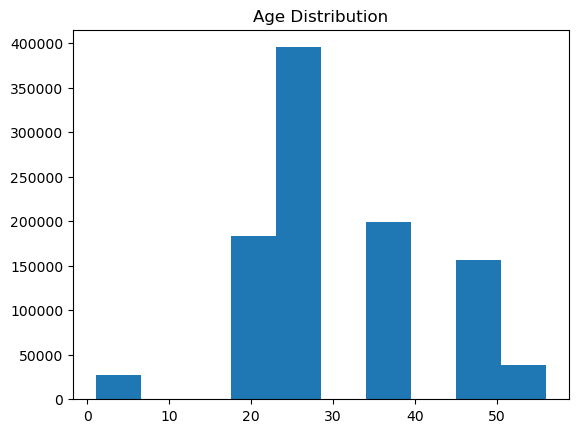

In [21]:
md.Age.hist(grid=False)
plt.title("Age Distribution")

Note: it's not giving me a good histogram because the data has its values already binned and categorized

In [22]:
md["Age"].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

Text(0, 0.5, 'Count')

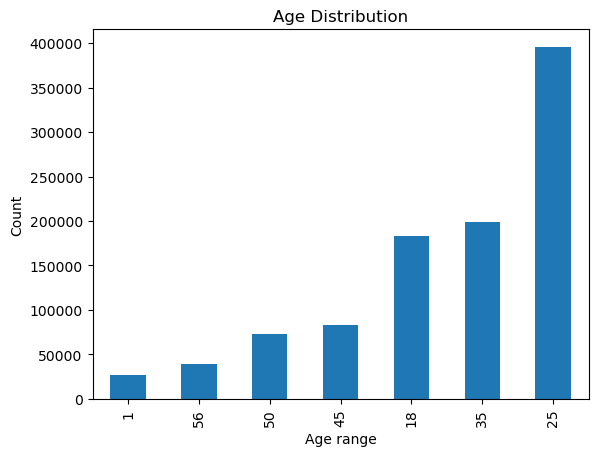

In [23]:
md.Age.value_counts().sort_values().plot(kind='bar')
plt.title("Age Distribution")
plt.xlabel("Age range")
plt.ylabel("Count")

[Text(0, 0, 'Under 18'),
 Text(1, 0, '18-24'),
 Text(2, 0, '25-34'),
 Text(3, 0, '35-44'),
 Text(4, 0, '45-49'),
 Text(5, 0, '50-55'),
 Text(6, 0, '56+')]

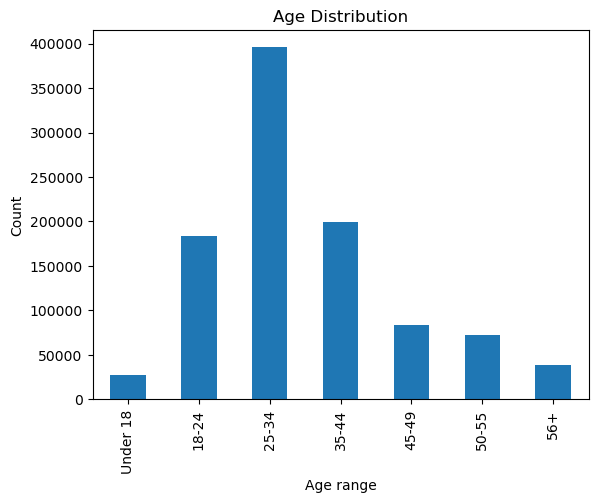

In [24]:
fig = md.Age.value_counts().sort_index().plot(kind='bar')

# set the x and y axis labels and title
plt.title("Age Distribution")
plt.xlabel("Age range")
plt.ylabel("Count")

#setting labels
x_labels = ["Under 18", "18-24",  "25-34", "35-44", "45-49", "50-55", "56+"]

fig.set_xticklabels(x_labels)

#### updating the code so that the age range corresponds with the correct bin

### Ignore other method

In [25]:
    # define the bin labels
    #labels = ["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"]

    # create a new column with the bin labels based on the Age column
    #md["Age Range"] = pd.cut(md["Age"], bins=[0, 17, 24, 34, 44, 49, 55, 60], labels=labels, include_lowest=True)

    # count the values and sort by Age Range
    #age_counts = md['Age Range'].value_counts().sort_index()

    # create a bar plot
    #ax = age_counts.plot(kind="bar")

    # set the x and y axis labels and title
    #ax.set_xlabel("Age Range")
    #ax.set_ylabel("Count")
    #ax.set_title("Age Distribution")

    # show the plot
    #plt.show()


In [26]:
md.head()

,UserID,MovieID,Rating,Title,Genres,Gender,Age,Occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10
2,1,914,3,My Fair Lady (1964),Musical|Romance,F,1,10
3,1,3408,4,Erin Brockovich (2000),Drama,F,1,10
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10


In [27]:
toy = md[md['Title'].str.contains(r'\bToy\b')]
toy

,UserID,MovieID,Rating,Title,Genres,Gender,Age,Occupation
40,1,1,5,Toy Story (1995),Animation|Children's|Comedy,F,1,10
50,1,3114,4,Toy Story 2 (1999),Animation|Children's|Comedy,F,1,10
203,3,3114,3,Toy Story 2 (1999),Animation|Children's|Comedy,M,25,15
469,6,1,4,Toy Story (1995),Animation|Children's|Comedy,F,50,9
581,8,1,4,Toy Story (1995),Animation|Children's|Comedy,M,25,12
...,...,...,...,...,...,...,...,...
998170,6032,1,4,Toy Story (1995),Animation|Children's|Comedy,M,45,7
998360,6035,1,4,Toy Story (1995),Animation|Children's|Comedy,F,25,1
998926,6036,3114,4,Toy Story 2 (1999),Animation|Children's|Comedy,F,25,15
999583,6037,3114,4,Toy Story 2 (1999),Animation|Children's|Comedy,F,45,1


In [28]:
md.loc[md['Title'] == 'Toy Story (1995)']

,UserID,MovieID,Rating,Title,Genres,Gender,Age,Occupation
40,1,1,5,Toy Story (1995),Animation|Children's|Comedy,F,1,10
469,6,1,4,Toy Story (1995),Animation|Children's|Comedy,F,50,9
581,8,1,4,Toy Story (1995),Animation|Children's|Comedy,M,25,12
711,9,1,5,Toy Story (1995),Animation|Children's|Comedy,M,25,17
837,10,1,5,Toy Story (1995),Animation|Children's|Comedy,F,35,1
...,...,...,...,...,...,...,...,...
997248,6022,1,5,Toy Story (1995),Animation|Children's|Comedy,M,25,17
997541,6025,1,5,Toy Story (1995),Animation|Children's|Comedy,F,25,1
998170,6032,1,4,Toy Story (1995),Animation|Children's|Comedy,M,45,7
998360,6035,1,4,Toy Story (1995),Animation|Children's|Comedy,F,25,1


In [29]:
toy = md.loc[md['Title'] == 'Toy Story (1995)']
rating_count = toy.groupby('Rating')['Rating'].count()
rating_count

Rating
1     16
2     61
3    345
4    835
5    820
Name: Rating, dtype: int64

### Distribution of the User Rating of Toy Story (1995) represented in a bar chart

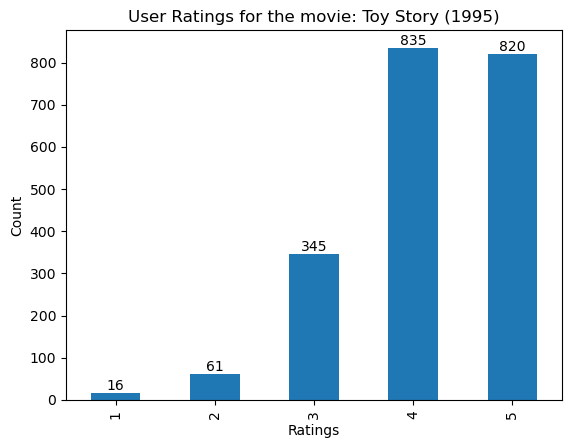

In [30]:
rating_count.plot(kind="bar")

# set the x and y axis labels and title
plt.title("User Ratings for the movie: Toy Story (1995)")
plt.xlabel("Ratings")
plt.ylabel("Count")

# add the count value as a label above each bar
for i, val in rating_count.iteritems():
    plt.text(x=i-1, y=val, s=val, ha='center', va='bottom') # added the -1 to shift the bars down one unit

Top 25 movies by viewership rating 

Using baseline rating 5 , need to filter out the titles with the top 25 highest count of rating 5

In [31]:
md.head()

,UserID,MovieID,Rating,Title,Genres,Gender,Age,Occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10
2,1,914,3,My Fair Lady (1964),Musical|Romance,F,1,10
3,1,3408,4,Erin Brockovich (2000),Drama,F,1,10
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10


In [32]:
five = md.loc[md['Rating'] == 5]
five

,UserID,MovieID,Rating,Title,Genres,Gender,Age,Occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10
6,1,1287,5,Ben-Hur (1959),Action|Adventure|Drama,F,1,10
7,1,2804,5,"Christmas Story, A (1983)",Comedy|Drama,F,1,10
10,1,595,5,Beauty and the Beast (1991),Animation|Children's|Musical,F,1,10
...,...,...,...,...,...,...,...,...
1000194,6040,1077,5,Sleeper (1973),Comedy|Sci-Fi,M,25,6
1000199,6040,2022,5,"Last Temptation of Christ, The (1988)",Drama,M,25,6
1000200,6040,2028,5,Saving Private Ryan (1998),Action|Drama|War,M,25,6
1000205,6040,1094,5,"Crying Game, The (1992)",Drama|Romance|War,M,25,6


In [33]:
top25 = five.groupby('Title')['Title'].count().sort_values(ascending=False).nlargest(25)
top25

Title
American Beauty (1999)                                   1963
Star Wars: Episode IV - A New Hope (1977)                1826
Raiders of the Lost Ark (1981)                           1500
Star Wars: Episode V - The Empire Strikes Back (1980)    1483
Godfather, The (1972)                                    1475
Schindler's List (1993)                                  1475
Shawshank Redemption, The (1994)                         1457
Matrix, The (1999)                                       1430
Saving Private Ryan (1998)                               1405
Sixth Sense, The (1999)                                  1385
Silence of the Lambs, The (1991)                         1350
Fargo (1996)                                             1278
Braveheart (1995)                                        1206
Pulp Fiction (1994)                                      1193
Princess Bride, The (1987)                               1186
Usual Suspects, The (1995)                               1144
St

### Top 25 Movies by Viewership Rating 5

Text(0, 0.5, 'Count')

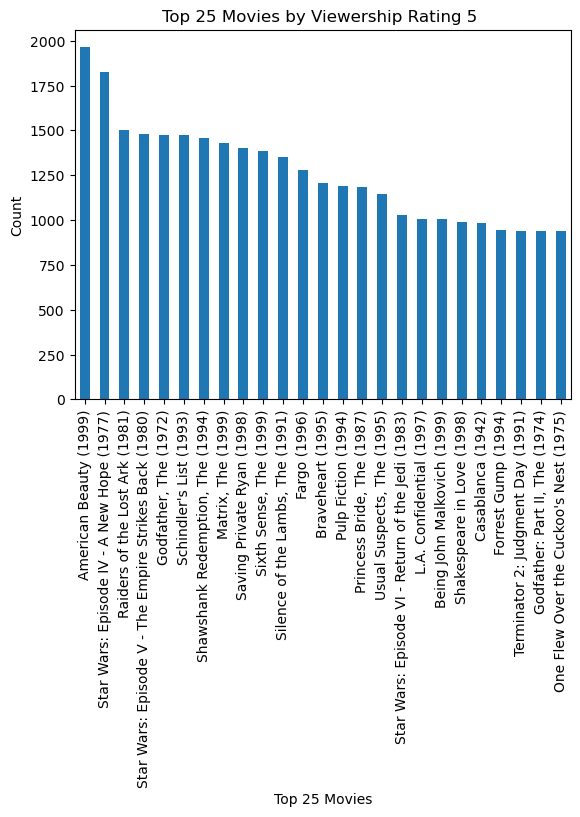

In [34]:
top25.plot(kind="bar")

# set the x and y axis labels and title
plt.title("Top 25 Movies by Viewership Rating 5 ")
plt.xlabel("Top 25 Movies")
plt.ylabel("Count")

### Movies and Ratings of User ID = 2696

In [35]:
md.loc[md["UserID"] == 2696, ["UserID","Title", "Rating"]]

,UserID,Title,Rating
440667,2696,"Shining, The (1980)",4
440668,2696,Back to the Future (1985),2
440669,2696,L.A. Confidential (1997),4
440670,2696,"Game, The (1997)",4
440671,2696,I Know What You Did Last Summer (1997),2
440672,2696,"Devil's Advocate, The (1997)",4
440673,2696,Wild Things (1998),4
440674,2696,"Perfect Murder, A (1998)",4
440675,2696,Lone Star (1996),5
440676,2696,I Still Know What You Did Last Summer (1998),2


Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [36]:
md.head()

,UserID,MovieID,Rating,Title,Genres,Gender,Age,Occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10
2,1,914,3,My Fair Lady (1964),Musical|Romance,F,1,10
3,1,3408,4,Erin Brockovich (2000),Drama,F,1,10
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10


In [37]:
md['Genres'].str.split('|')

0                                       [Drama]
1              [Animation, Children's, Musical]
2                            [Musical, Romance]
3                                       [Drama]
4               [Animation, Children's, Comedy]
                           ...                 
1000204                                [Comedy]
1000205                   [Drama, Romance, War]
1000206                         [Comedy, Drama]
1000207                                 [Drama]
1000208    [Children's, Drama, Fantasy, Sci-Fi]
Name: Genres, Length: 1000209, dtype: object

In [38]:
genres_list = set(md['Genres'].str.split('|').explode().tolist())
genres_list

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [39]:
genre_counts = md['Genres'].str.split('|').explode().value_counts()
genre_counts.sort_values()

Documentary      7910
Film-Noir       18261
Western         20683
Fantasy         36301
Mystery         40178
Musical         41533
Animation       43293
War             68527
Children's      72186
Horror          76386
Crime           79541
Adventure      133953
Romance        147523
Sci-Fi         157294
Thriller       189680
Action         257457
Drama          354529
Comedy         356580
Name: Genres, dtype: int64

### Based on this the unique genres are assumed to have a lower count, and this includes Documentary and Film-Noir

You may refer to the complete list of the documentaries and their total counts above. One movie may have more than 1 genre hence the sum of the counts are not the total counts

### One-hot encoding ( 1 and 0) of genres


In [40]:
md.head()

,UserID,MovieID,Rating,Title,Genres,Gender,Age,Occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10
2,1,914,3,My Fair Lady (1964),Musical|Romance,F,1,10
3,1,3408,4,Erin Brockovich (2000),Drama,F,1,10
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10


In [41]:
genres = md["Genres"].str.get_dummies("|")
genres

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1000205,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1000206,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1000207,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [42]:
md_genre = pd.concat([md, genres], axis=1)
pd.set_option('display.max_columns', None)
md_genre.head()

,UserID,MovieID,Rating,Title,Genres,Gender,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,914,3,My Fair Lady (1964),Musical|Romance,F,1,10,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1,3408,4,Erin Brockovich (2000),Drama,F,1,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### One-hot encoding ( 1 and 0) of Gender

In [43]:
md_genre["Gender"].value_counts()

M    753769
F    246440
Name: Gender, dtype: int64

In [44]:
md_genre_gender = pd.get_dummies(md_genre["Gender"])
md_genre_gender

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1000204,0,1
1000205,0,1
1000206,0,1
1000207,0,1


In [45]:
md1 = pd.concat([md_genre, md_genre_gender], axis = 1)
md1

,UserID,MovieID,Rating,Title,Genres,Gender,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,1,914,3,My Fair Lady (1964),Musical|Romance,F,1,10,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,1,3408,4,Erin Brockovich (2000),Drama,F,1,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,Weekend at Bernie's (1989),Comedy,M,25,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1000205,6040,1094,5,"Crying Game, The (1992)",Drama|Romance|War,M,25,6,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
1000206,6040,562,5,Welcome to the Dollhouse (1995),Comedy|Drama,M,25,6,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1000207,6040,1096,4,Sophie's Choice (1982),Drama,M,25,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


### Determine the features affecting the ratings of any particular movie.

Notes: 

Assumption - Potential things that may affect is gender, age, occupation, genres

My Ho is that gender, age, occupation, genres have no influence on a movie's rating

Ha is that gender, age, occupation, genres has an influence on a movie's rating

Will be treating the Rating as continuous value, hence will be using the linear regression model

In [46]:
import scipy.stats as stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

In [47]:
md1.head(1)

,UserID,MovieID,Rating,Title,Genres,Gender,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [48]:
y = md1['Rating']
md1_X = md1.drop(["Rating", "Title", "MovieID", "Genres", "Gender"], axis = 1)
column_names = md1_X.columns.tolist()
column_names 

['UserID',
 'Age',
 'Occupation',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western',
 'F',
 'M']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(md1_X, y, test_size = 0.2, random_state = 0)

<AxesSubplot:>

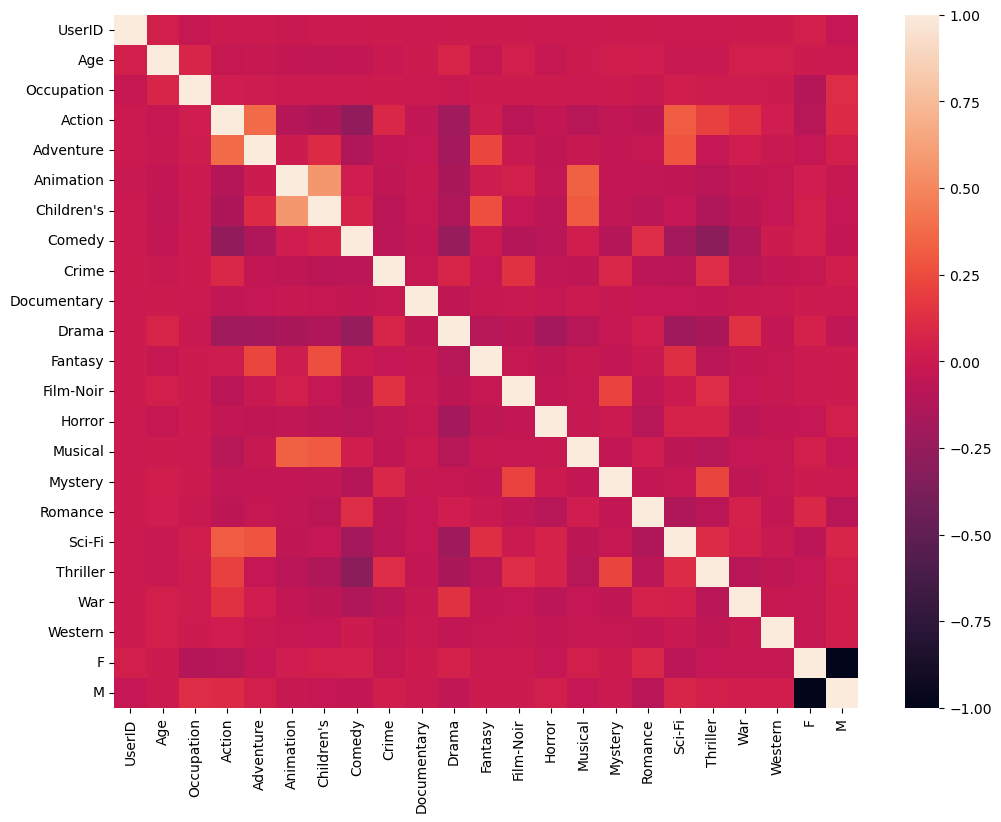

In [50]:
#checking for multicolinearity 

corrmat = X_train.corr()

fig, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat)

Multicolinearity is not present
Standard scaling is not required as well

### Applying Linear Regression Model

In [51]:
#creating baseline model

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [52]:
X_train = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1434.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:27:29   Log-Likelihood:            -1.2090e+06
No. Observations:              800167   AIC:                         2.418e+06
Df Residuals:                  800144   BIC:                         2.418e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.2472      0.004    622.267      0.000       2.240       2.254
UserID       5.865e-06    7.1e-07      8.259      0.000    4.47e-06    7.26e-06
Age             0.0039      0.000     37.240      0.000       0.004       0.004
Occupation      0.0010      0.000      5.023      0.000       0.001       0.001
Action         -0.1006      0.004    -28.676      0.000      -0.107      -0.094
Adventure       0.0090      0.004      2.159      0.031       0.001       0.017
Animation       0.3694      0.008     47.692      0.000       0.354       0.385
Children's     -0.3202      0.006    -50.559      0.000      -0.333      -0.308
Comedy         -0.0151      0.003     -4.698      0.000      -0.021      -0.009
Crime           0.0958      0.005     20.238      0.000       0.087       0.105
Documentary     0.4160      0.014     29.463      0.000       0.388       0.444
Drama           0.2294      0.003     70.067      0.000       0.223       0.236
Fantasy         0.0669      0.007      9.354      0.000       0.053       0.081
Film-Noir       0.4342      0.010     44.803      0.000       0.415       0.453
Horror         -0.2868      0.005    -57.570      0.000      -0.297      -0.277
Musical         0.1538      0.007     22.970      0.000       0.141       0.167
Mystery         0.0124      0.007      1.882      0.060      -0.001       0.025
Romance        -0.0097      0.004     -2.711      0.007      -0.017      -0.003
Sci-Fi         -0.0248      0.004     -6.560      0.000      -0.032      -0.017
Thriller        0.0581      0.004     15.977      0.000       0.051       0.065
War             0.2934      0.005     57.821      0.000       0.283       0.303
Western         0.1095      0.009     12.514      0.000       0.092       0.127
F               1.1407      0.002    465.691      0.000       1.136       1.145
M               1.1065      0.002    509.663      0.000       1.102       1.111
==============================================================================
Omnibus:                    37255.421   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39680.747
Skew:                          -0.520   Prob(JB):                         0.00
Kurtosis:                       2.672   Cond. No.                     8.40e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.38e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

For p-values < 0.05 we reject Ho

### Hence, the factors affecting movie ratings are : Age, Occupation, Gender, and all the genres except Mystery

### Linear regression model to predict the movie ratings

In [53]:
model.predict(X_test)

array([3.38752413, 3.37338104, 3.72701032, ..., 3.39385613, 3.81146207,
       3.59439396])

### As the R2 value is very low, it indicates that linear regression is not the best model to use in this case and y variable rating should be treated as a categorical value instead

In [54]:
md1.head()

,UserID,MovieID,Rating,Title,Genres,Gender,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,1,914,3,My Fair Lady (1964),Musical|Romance,F,1,10,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,1,3408,4,Erin Brockovich (2000),Drama,F,1,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [72]:
y = md1['Rating']
md1_X = md1.drop(["Rating", "Title", "MovieID", "Genres", "Gender", "Mystery"], axis = 1)

In [73]:
md1_X.head()

,UserID,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Romance,Sci-Fi,Thriller,War,Western,F,M
0,1,1,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,1,10,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,1,10,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
3,1,1,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1,1,10,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Logistic regression model

In [59]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, 
                            classification_report, roc_curve, f1_score)
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, learning_curve
from sklearn.preprocessing import StandardScaler

In [78]:
X_train, X_test, y_train, y_test = train_test_split(md1_X, y, test_size = 0.3, random_state = 42)

In [79]:
# Create an instance of LogisticRegression()
lr = LogisticRegression()

lr.fit(X_train, y_train)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
y_pred = lr.predict(X_test)

In [81]:
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.3483201860942535


### Random Forest Model

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import accuracy_score

In [75]:
X_train, X_test, y_train, y_test = train_test_split(md1_X, y, test_size = 0.3, random_state = 42)

dtree = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth = 12, min_samples_leaf=5)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=5, random_state=100)

In [76]:
y_pred_dtree=dtree.predict(X_test)

In [77]:
print("accuracy score",round(accuracy_score(y_test, y_pred_dtree),2))
print(classification_report(y_test, y_pred_dtree))

accuracy score 0.36
              precision    recall  f1-score   support

           1       0.38      0.03      0.05     17015
           2       0.21      0.01      0.01     32061
           3       0.31      0.12      0.17     78351
           4       0.36      0.84      0.50    104518
           5       0.42      0.15      0.22     68118

    accuracy                           0.36    300063
   macro avg       0.34      0.23      0.19    300063
weighted avg       0.35      0.36      0.27    300063



In [ ]:
#accuracy scores and R2 values for these models are weak, indicating these are not good models for prediction
#it could also indicate that genres, age, occupation are not helpful with predicting movie ratings